In [29]:
from ast import increment_lineno
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [30]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [31]:
len(x_train)

60000

In [32]:
len(y_train)

60000

In [33]:
x_train[0].shape

(28, 28)

In [34]:
x_train = x_train/255
x_test = x_test/255

In [35]:
len(x_test)

10000

In [36]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

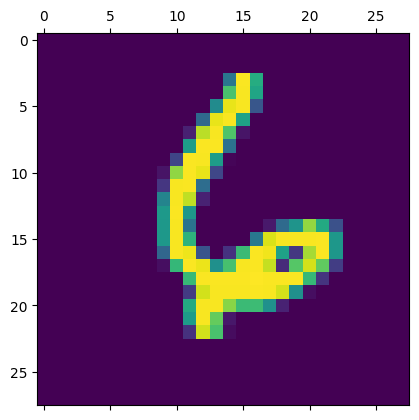

In [37]:
plt.matshow(x_train[59000])

In [38]:
x_train_flatten = x_train.reshape(len(x_train), 28*28)

In [39]:
x_train_flatten.shape

(60000, 784)

In [40]:
x_test_flatten = x_test.reshape(len(x_test), 28*28)

In [41]:
# create simple nn without hidden layers

model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation= "sigmoid")
])

model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train_flatten, y_train, epochs = 5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8089 - loss: 0.7252
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9138 - loss: 0.3050
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9220 - loss: 0.2814
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9241 - loss: 0.2747
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9262 - loss: 0.2670


In [42]:
model.evaluate(x_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9142 - loss: 0.3039


[0.2667715847492218, 0.9254999756813049]

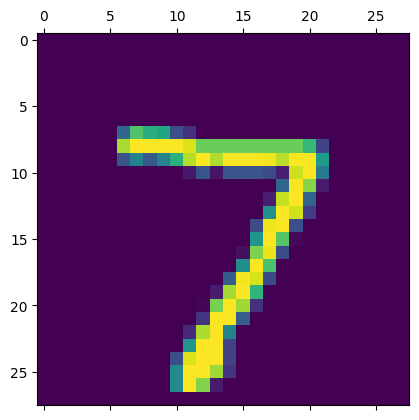

In [44]:
plt.matshow(x_test[0])

In [45]:
y_pred = model.predict(x_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [46]:
y_pred[0]

array([3.5476070e-02, 4.5290716e-07, 8.0720700e-02, 9.6393269e-01,
       2.5953499e-03, 1.4484410e-01, 1.5458309e-06, 9.9979252e-01,
       8.6925156e-02, 6.3598478e-01], dtype=float32)

In [48]:
print(np.argmax(y_pred[0]))

7


In [52]:
y_pred_l = [np.argmax(i) for i in y_pred]

In [55]:
y_pred_l[:6]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1)]

In [49]:
y_test[:6]

array([7, 2, 1, 0, 4, 1], dtype=uint8)

In [57]:
cm = tf.math.confusion_matrix(labels=y_test, predictions= y_pred_l)

In [58]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   3,    9,  941,   14,    9,    4,   11,   10,   28,    3],
       [   2,    0,   26,  921,    0,   24,    2,   10,   19,    6],
       [   2,    1,   10,    1,  913,    0,    7,    4,   10,   34],
       [   9,    3,    8,   35,    9,  781,   10,    5,   27,    5],
       [  12,    3,   11,    1,    8,   16,  903,    2,    2,    0],
       [   1,    7,   25,    7,    7,    0,    0,  954,    1,   26],
       [   7,   11,    9,   27,    9,   30,    9,   13,  851,    8],
       [  11,    7,    1,   12,   29,    6,    0,   28,    5,  910]],
      dtype=int32)>

In [59]:
import seaborn as sn

Text(95.72222222222221, 0.5, 'truth')

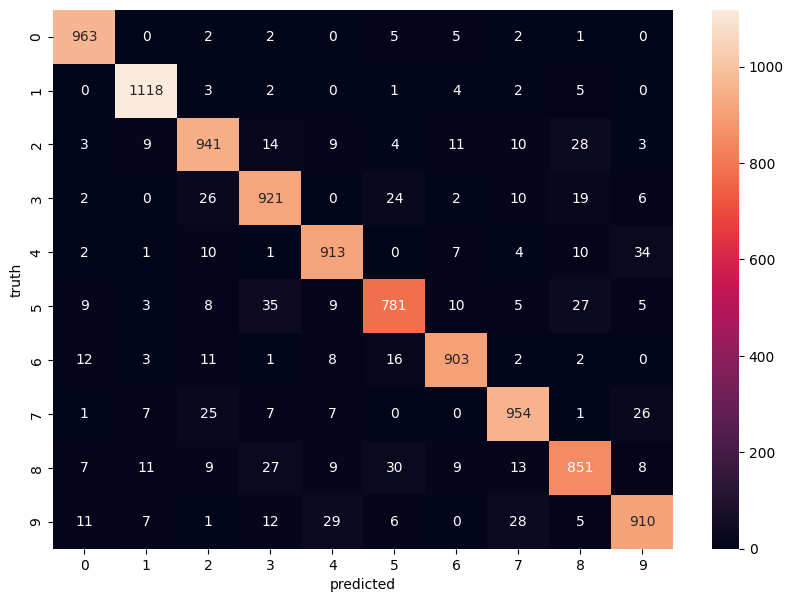

In [60]:
plt.figure(figsize= (10,7))
sn.heatmap(cm, annot = True, fmt ='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [69]:
# with one hidden layer with 100 neurons

model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784, ), activation = "relu"),
    keras.layers.Dense(10, activation= "sigmoid")
])

model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train_flatten, y_train, epochs = 8)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8729 - loss: 0.4470
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9608 - loss: 0.1344
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9733 - loss: 0.0895
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9806 - loss: 0.0663
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9845 - loss: 0.0524
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9878 - loss: 0.0405
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9889 - loss: 0.0347
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9927 - loss: 0.0247


In [70]:
model.evaluate(x_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9728 - loss: 0.0987


[0.07973433285951614, 0.9769999980926514]

Text(95.72222222222221, 0.5, 'truth')

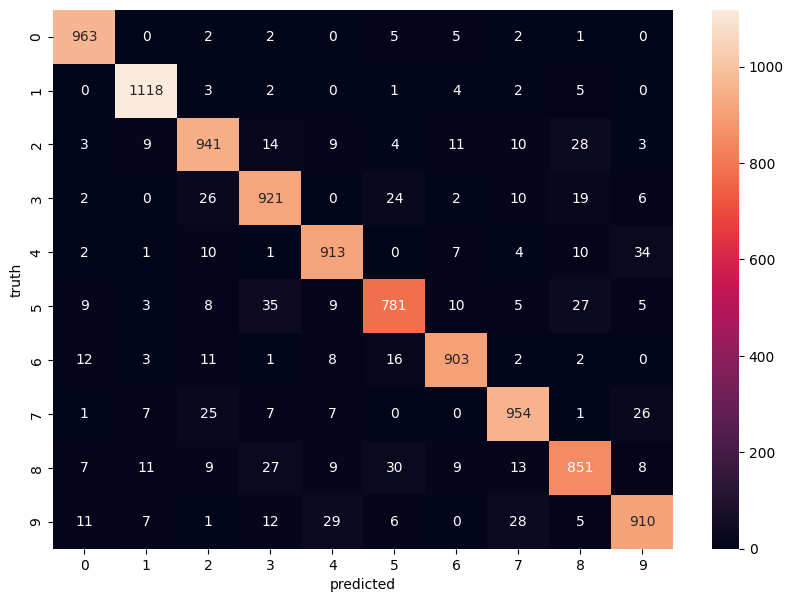

In [71]:
plt.figure(figsize= (10,7))
sn.heatmap(cm, annot = True, fmt ='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [ ]:
# without creating x_flatten

model = keras.Sequential([
    keras.layers.Dense(input_shape= (28,28)),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation= "sigmoid")
])

model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train_flatten, y_train, epochs = 8)